In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Exploring the data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Preprocess the data

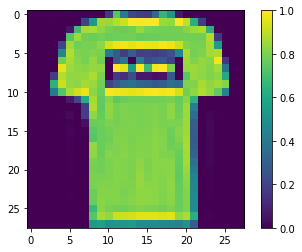

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#scale this values from 0 to 1 before feeding to the model.
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images

In [ ]:
test_images

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

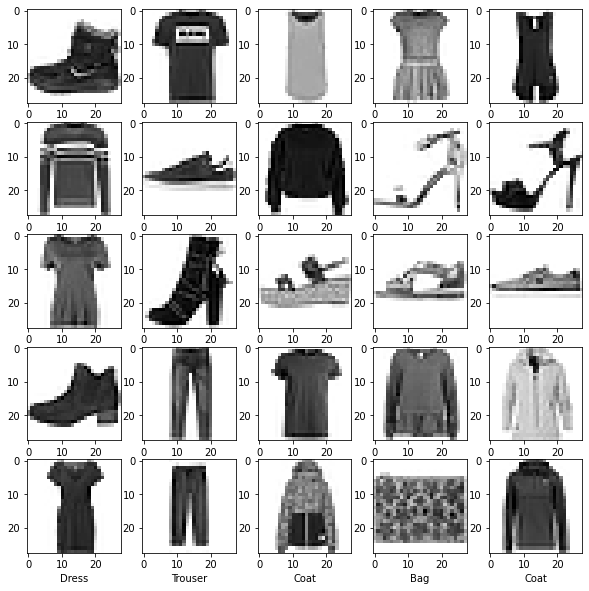

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the model

Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(10)
])

1.The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

2.fter the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). 

The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

Training the neural network model requires the following steps:

1.Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

2.The model learns to associate images and labels.

3.You ask the model to make predictions about a test set—in this example, the test_images array.

4.Verify that the predictions match the labels from the test_labels array.

*Feed the model.*

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5165 - accuracy: 0.5561
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6775 - accuracy: 0.7539
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5774 - accuracy: 0.7938
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5347 - accuracy: 0.8110
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8212
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4867 - accuracy: 0.8276
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4668 - accuracy: 0.8368
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.8400
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4453 - accuracy: 0.8418
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.434

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.84 (or 84%) on the training data.

**Evaluate accuracy**

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.4613 - accuracy: 0.8331


In [ ]:
print('\nTest Accuracy: ',test_acc)


Test Accuracy:  0.8331000208854675


it turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

Demonstrate overfitting
Strategies to prevent overfitting

**Make Predictions**

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
predictions=probability_model.predict(test_images)

In [ ]:
predictions[0]

array([3.9841987e-07, 2.6254817e-08, 1.6783657e-06, 5.5622068e-06,
       1.0506937e-05, 1.3393368e-01, 5.2760493e-06, 3.1427673e-01,
       5.0926036e-03, 5.4667354e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_images(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xlabel([])
  plt.ylabel([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xlabel(range(10))
    plt.ylabel([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


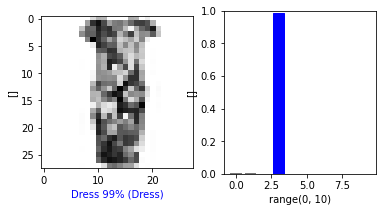

In [ ]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

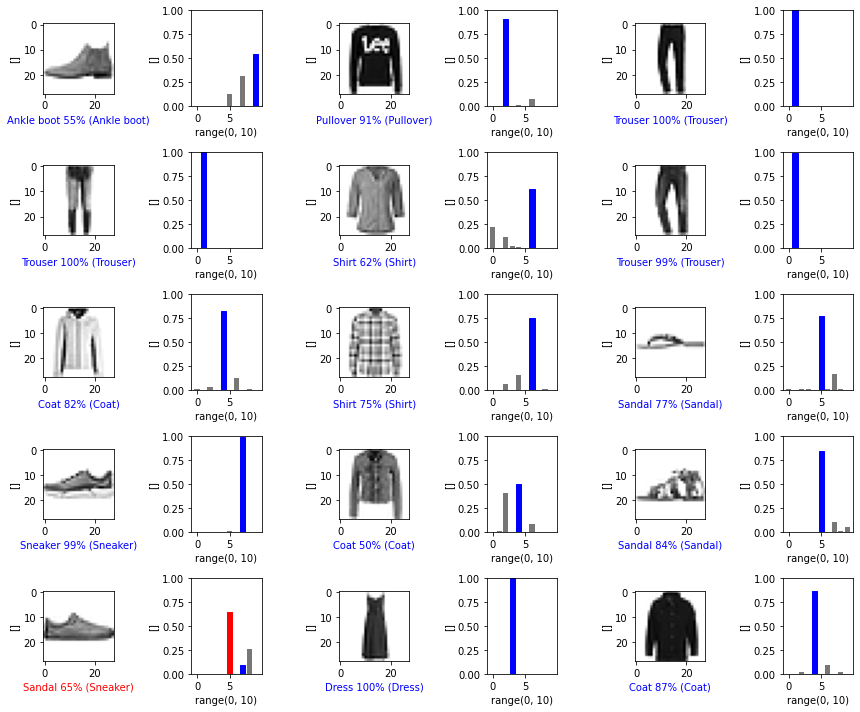

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#use it over trained model for single images

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4849945e-04 1.0597065e-05 9.1498768e-01 9.7811724e-05 1.0530931e-02
  2.8852820e-09 7.3895074e-02 2.8725231e-15 1.2941116e-04 3.1249350e-11]]


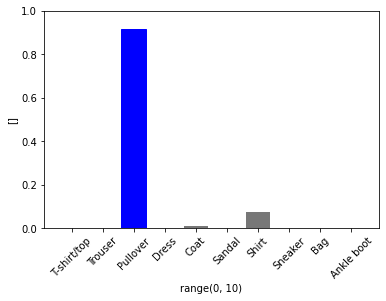

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2